<img src="udlap.JPG" alt="Drawing" style="width: 400px;"/>

# Classical Machine Learning example

The purpose of this example is to demonstrate the steps associated to a supervised learning approach.

Example features:

1. All the code was implemented in Python 2.7 https://www.python.org/
2. The dataset used is an excerpt of the Sina Weibo website (https://weibo.com/login.php) from September 2014 to May 2015 which contain several features related to social media interactions among platform users.
3. The  Python packages required to run the programs are the following:
    * Jupyter notebook (Python interactive prompt) http://jupyter.org/index.html
    * Numpy (classification) http://www.numpy.org/
	* Scikit-learn (classification) http://scikit-learn.org/stable/
	* Pandas (Data analysis) https://pandas.pydata.org/
    * Matplotlib (visualization) https://matplotlib.org/

    
## Exploratory data analysis

The first step performed to applied a machine learning approach is to analize the different features available in  the dataset in order to understand the nature of information.The following shows how to achieve this task:

- Load the whole dataset.


In [46]:
#Import Pandas which help us to work with a structured dataset easily
import pandas as pd
#For displaying the table in the jupyter notebook
from IPython.display import display, Markdown
#Load the whole Microsoft Excel file
data = pd.read_excel("2015_weibodata.xlsx", sheet_name=None)
#Show the first five rows of the dataset
data.head(5)


,`year`,`month`,`day`,`hour`,`minute`,`lon`,`lat`,`user_id`,`gender`,`province`,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,2014,9,1,15,52,121.57677,31.335880,2203784962,'f','31',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,9,1,16,47,121.54950,31.366600,1006306595,'m','100',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,9,1,17,7,121.56900,31.349600,2027776417,'m','31',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,9,1,19,52,121.56594,31.346882,3948063033,'m','100',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,9,1,21,44,121.57879,31.341780,2275605075,'f','31',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Obtain some relevant statistics associated to the dataset.

In [47]:
#Get some basic information from the table
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174967 entries, 0 to 174966
Data columns (total 31 columns):
 `year`               174967 non-null int64
 `month`              174967 non-null int64
 `day`                174967 non-null int64
 `hour`               174967 non-null int64
 `minute`             174967 non-null int64
 `lon`                174967 non-null float64
 `lat`                174967 non-null float64
 `user_id`            174967 non-null int64
 `gender`             174967 non-null object
 `province`           174967 non-null object
 `city`               174967 non-null object
 `statuses_count`     174967 non-null int64
 `followers_count`    174967 non-null int64
 `friends_count`      174967 non-null int64
 `reposts_count`      174967 non-null int64
 `comments_count`     174967 non-null int64
 `text`               174967 non-null object
Unnamed: 17           2416 non-null object
Unnamed: 18           808 non-null object
Unnamed: 19           509 non-null object
Unname

- Considering the dataset size (174967 rows), a random row subset is selected to demonstrate the example based on average computer capabilities and time that could take the experiment using the whole dataset.  

In [48]:
#Obtain a random row subset of size n from the original table 
data=data.sample(n=27000)
#Reset table indices (start from 0 to n-1)
data = data.reset_index(drop=True)

- Eliminate unnecessary columns from the table.

In [49]:
#Eliminate columns that don't have any meaningful information
cleanData = data[data.columns[:-14]]
#Show again the information about the table
cleanData.info()
#Obtain the first five rows without unnecessary columns
cleanData.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27000 entries, 0 to 26999
Data columns (total 17 columns):
 `year`               27000 non-null int64
 `month`              27000 non-null int64
 `day`                27000 non-null int64
 `hour`               27000 non-null int64
 `minute`             27000 non-null int64
 `lon`                27000 non-null float64
 `lat`                27000 non-null float64
 `user_id`            27000 non-null int64
 `gender`             27000 non-null object
 `province`           27000 non-null object
 `city`               27000 non-null object
 `statuses_count`     27000 non-null int64
 `followers_count`    27000 non-null int64
 `friends_count`      27000 non-null int64
 `reposts_count`      27000 non-null int64
 `comments_count`     27000 non-null int64
 `text`               27000 non-null object
dtypes: float64(2), int64(11), object(4)
memory usage: 3.7+ MB


,`year`,`month`,`day`,`hour`,`minute`,`lon`,`lat`,`user_id`,`gender`,`province`,`city`,`statuses_count`,`followers_count`,`friends_count`,`reposts_count`,`comments_count`,`text`
0,2015,1,27,22,46,121.530580,31.367880,5384176096,'m','31','1000',6,1,34,0,0,'来看看我的#照片电影#，点此播放>> http://t.cn/RZmEguG（通过 #美...
1,2015,5,13,0,11,121.612780,31.145954,5508126730,'f','31','12',42,26,107,2,2,'最近又重新看了runnging man发现懵智和朴瑞俊做游戏吻到之后，狗哥的表情真的是看...
2,2015,1,12,15,11,121.517100,31.314160,2659670782,'f','11','8',375,557,549,0,0,'来看看我的#照片电影#：“#寻找最美微笑女孩#@昕薇 @崇尚发艺”，点此播放>> htt...
3,2015,2,1,11,2,121.428473,31.267088,1890851335,'f','31','1',16881,1256,464,0,0,'我在甘泉公园 http://t.cn/RZeIq6Z');
4,2015,1,26,20,57,121.427700,31.290200,3004454491,'f','43','1',162,41,166,0,0,'╮(╯▽╰)╭我的天......闸北体育馆...离得这么近的时候，居然走了，后悔啊[泪]...


- Transform the colums __province__ and __city__ to integers taking into account their numerical nature. 

In [50]:
%%capture
cleanData[' `province`']=cleanData[' `province`'].str[2:-1].apply(int)
cleanData[' `city`']=cleanData[' `city`'].str[2:-1].apply(int)

- From the above information, it can be noticed that the majority of columns are numerical except from the comment column (text message in Chinese), so any of these numerical attributes can be used for a classical supervised learning apporach. Now let's analyze the columns that could have a categorical nature (repetitive values) and can be used as target labels in a classification approach.

In [51]:
#Get a list of the column headers
columNames=list(cleanData.columns.values)
for names in columNames[:-1]:
    print "-----------------------------"
    #Obtain the different values (and the number of rows associated) stored in each column
    print cleanData[names].value_counts()
    print "-----------------------------"

-----------------------------
2015    21977
2014     5023
Name:  `year`, dtype: int64
-----------------------------
-----------------------------
1     7740
5     5880
4     3922
2     3333
12    2301
11    1557
3     1102
10     735
9      430
Name:  `month`, dtype: int64
-----------------------------
-----------------------------
18    1266
27    1135
8     1122
26    1069
25    1051
17    1028
16    1017
14     994
15     986
28     968
24     941
7      923
13     921
19     908
1      898
4      862
12     854
10     854
9      853
3      840
6      813
5      808
11     791
23     772
2      750
22     681
21     639
30     608
20     603
29     575
31     470
Name:  `day`, dtype: int64
-----------------------------
-----------------------------
22    2418
21    2145
23    1938
20    1920
19    1698
18    1529
17    1343
16    1281
0     1275
12    1187
15    1167
9     1102
14    1081
11    1076
13    1070
10    1054
8      944
1      712
7      699
6      396
2      345
5      

- From all the columns analyzed, the __gender attribute__ can be used as a suitable option for a __classification task__, where the idea would be to determine if certain interaction was performed by a woman or a man considering the other columns values.



In [52]:
print cleanData[' `gender`'].value_counts()

 'f'    16801
 'm'    10199
Name:  `gender`, dtype: int64


- To see more clearly the above, let's plot a pie-chart according to the number of rows associated to each gender.

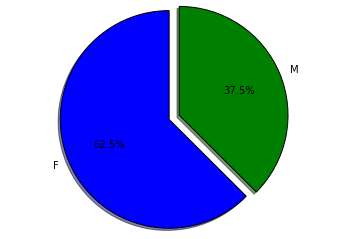

In [53]:
#Command used to see the matplotlib output inside the notebook
%matplotlib inline
import matplotlib.pyplot as plt
#Labels associated to each element in the pie chart
labels = 'F', 'M'
#Number of rows related to each gender
sizes = [109416, 65551]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
#Plot the figure
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#Show the figure
plt.show()

- For the rest of colums we can confirm the relative importance of each of them (in a classification process) by drawing a histogram that show the number of intances (vertical axis) that have a given value (horizontal axis).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000271AF5C0>,
      dtype=object)

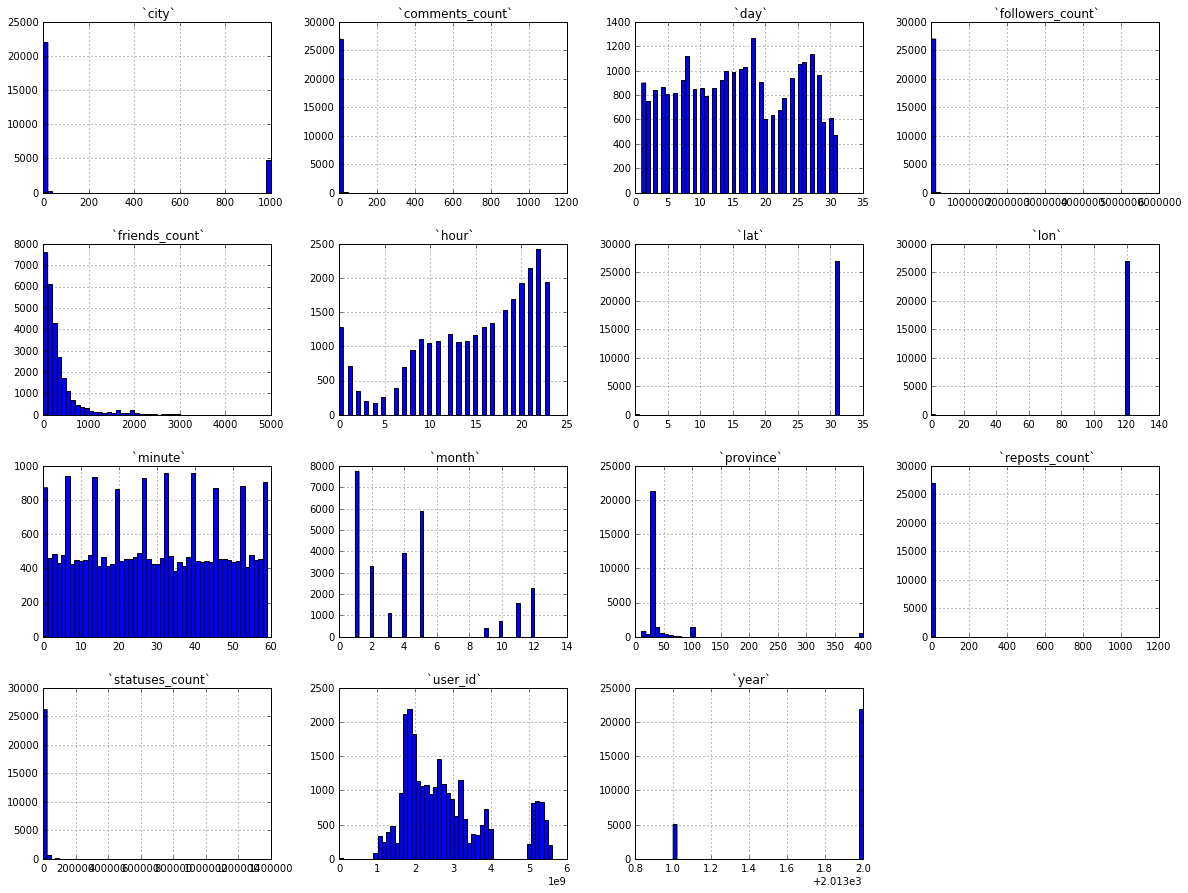

In [54]:
%matplotlib inline

import matplotlib.pyplot as plt
#Plot a histogram for each attribute
cleanData.hist(bins=50,figsize=(20,15))

##  Feature Dataset Creation

- After analyzed the table attributes, the next step is to subset the columns that are going to be used in a classification process.

In [55]:
#According to the attributes nature and type, select the most representative ones as features for a classification process
FeatureCols=[' `year`', ' `month`', ' `day`', ' `hour`', ' `minute`',' `province`', ' `city`', 
             ' `statuses_count`', ' `followers_count`', ' `friends_count`', ' `reposts_count`',
             ' `comments_count`']

#Subset the features into a new table
featuresDataset = cleanData.loc[:, FeatureCols]
#Show the first five feature rows 
featuresDataset.head(5)
                          

,`year`,`month`,`day`,`hour`,`minute`,`province`,`city`,`statuses_count`,`followers_count`,`friends_count`,`reposts_count`,`comments_count`
0,2015,1,27,22,46,31,1000,6,1,34,0,0
1,2015,5,13,0,11,31,12,42,26,107,2,2
2,2015,1,12,15,11,11,8,375,557,549,0,0
3,2015,2,1,11,2,31,1,16881,1256,464,0,0
4,2015,1,26,20,57,43,1,162,41,166,0,0


In [56]:
#Select the classification attribute (what we want to predict from the features)             
labelCol=' `gender`'
#Subset for each feature their respective label
#Transform the lable to a string variable
labelsDataset= cleanData.loc[:,labelCol].str[2:-1].apply(str) 
#Save the label as small as possible in memory
labelsDataset.astype('|S')
#Show the first five label rows 
labelsDataset.head(5)

0    m
1    f
2    f
3    f
4    f
Name:  `gender`, dtype: object

- Slice the feature dataset as well as the labels dataset into multiple training and test subsets in order to try different classification variations according to the K-fold cross validation technique.

![K-fold cross validation technique](kfold.jpg)

In [57]:
#Import Kfold function from the scikit-learn  which is Machine learning package for Python
#http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
from sklearn.model_selection import KFold
# Define the split - into five folds using a random parameter to get different partitions
kf = KFold(n_splits=5,shuffle=True)
# Returns the number of splitting iterations in the cross-validation process
kf.get_n_splits(featuresDataset)
#Print the object to ensure that everything works fine
print(kf)

KFold(n_splits=5, random_state=None, shuffle=True)


## Classification process

- The next step is to create a classification model for each fold provided considering training and test partitions. 

![Supervised learning steps](supervisedLearning.jpg)

In [58]:
#Import Kfold function from the scikit-learn which is Machine learning package for Python
#http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
from sklearn.model_selection import KFold
for train_indices, test_indices in kf.split(featuresDataset):
    #Print the first ten indices associated to the row features
    print('Train: %s | test: %s' % (train_indices[:10], test_indices[:10]))

Train: [ 0  1  3  4  5  6  8  9 11 12] | test: [ 2  7 10 17 27 28 34 37 42 46]
Train: [ 1  2  3  5  6  7  8  9 10 11] | test: [ 0  4 14 18 40 48 51 59 64 66]
Train: [ 0  1  2  4  6  7  8  9 10 11] | test: [ 3  5 21 25 26 39 41 43 44 47]
Train: [ 0  1  2  3  4  5  6  7 10 11] | test: [ 8  9 13 19 24 31 32 36 38 50]
Train: [ 0  2  3  4  5  7  8  9 10 13] | test: [ 1  6 11 12 15 16 20 22 23 29]


- Use different classifiers to predict the gender taking into account the state of the art available tools.

In [59]:
#Import a Support Vector Machine (SVM) classifier from the scikit-learn package
#http://scikit-learn.org/stable/modules/svm.html
from sklearn import svm
from sklearn.svm import LinearSVC
clf1= svm.LinearSVC()

In [60]:
#Import a logistic regression classifier from the scikit-learn package
#http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn import linear_model
clf2 = linear_model.LogisticRegression(C=1e5)


In [61]:
#Import a Multinomial Naive Bayes classifier from the scikit-learn package
#http://scikit-learn.org/stable/modules/naive_bayes.html
from sklearn.naive_bayes import MultinomialNB
clf3 = MultinomialNB()

- Fit each classifier using the folds provided (training and test partitions) and calculate the mean accuracy associated.

In [62]:
#Import the mathematical package used for python to obtain the average accuracy of the results provided for each fold
import numpy as np
#Append the classifiers into a Python list for evaluation each of them
classifiers=[clf1,clf2,clf3]
#Append the classifiers name for showing the results
classifierType=["Support Vector Machine","logistic regression","Multinomial Naive Bayes"]
#Apply each classifier and obtain the accuracy of each fold
for classifier,name in zip(classifiers,classifierType):
    num=1
    results=[]
    print "Classifier name: "+name
    for train, test in kf.split(featuresDataset):
        #http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html
        #The fit function take as parameters the features and labels samples generated for each training fold
        result=classifier.fit(featuresDataset.ix[train], 
                      #The score function take as parameters the features and labels samples generated for each test fold
                      labelsDataset.ix[train]).score(featuresDataset.ix[test],
                                                 labelsDataset.ix[test])
        print  "fold: "+str(num)+": "+str(result)
        results.append(result)
        num+=1
    #Obtain the average acuraccy of each classifier    
    #https://docs.scipy.org/doc/numpy/reference/generated/numpy.average.html    
    print "Average accuracy: "+str(np.average(results))    

Classifier name: Support Vector Machine
fold: 1: 0.3788888888888889
fold: 2: 0.37851851851851853
fold: 3: 0.40574074074074074
fold: 4: 0.38407407407407407
fold: 5: 0.6261111111111111
Average accuracy: 0.4346666666666666
Classifier name: logistic regression
fold: 1: 0.6272222222222222
fold: 2: 0.6309259259259259
fold: 3: 0.642962962962963
fold: 4: 0.6427777777777778
fold: 5: 0.6412962962962963
Average accuracy: 0.6370370370370371
Classifier name: Multinomial Naive Bayes
fold: 1: 0.6307407407407407
fold: 2: 0.6259259259259259
fold: 3: 0.6237037037037036
fold: 4: 0.605925925925926
fold: 5: 0.6381481481481481
Average accuracy: 0.6248888888888888
